# Task 1 (09 may 2025)

In [2]:
import openpyxl
import pandas

In [3]:

accutest = openpyxl.load_workbook('Accutest.xlsx')
sample1 = openpyxl.load_workbook('smaple1.xlsx')
sample2 = openpyxl.load_workbook('sample2.xlsx')

In [4]:
quote_for_fire_package = accutest['Quote for Fire Package']
sookshma = accutest['Sookshma']
laghu = accutest['Laghu 2']
claims = accutest['Claims-SFSP']
stocks = accutest['Stocks']
annexure = accutest['MBD-Annexure']
quotations = sample1['Quotations']
sheet1 = sample2['Sheet1']


In [5]:
# sheets = [quote_for_fire_package,sookshma,laghu,claims,stocks,annexure]
sheets = [quotations, sheet1]
target = ['Name of Insured', 'Correspondence Address','Communication Address']

In [6]:
for sheet in sheets:
    print(f"\n--- {sheet.title} ---")
    found = {key: None for key in target}

    for row in sheet.iter_rows(min_row=1, values_only=True):
        if not row:
            continue
        cell_a = str(row[0]).strip() if row[0] else ""
        cell_b = str(row[1]).strip() if len(row) > 1 and row[1] else ""

        for i in target:
            if cell_a == i and not found[i]:
                found[i] = cell_b
            elif i in cell_a and not found[i]:
                parts = cell_a.split(":-")
                if len(parts) == 2:
                    found[i] = parts[1].strip()
                elif ":" in cell_a:
                    found[i] = cell_a.split(":", 1)[1].strip()
    for key, value in found.items():
        print(f"{key}: {value if value else '[Not found]'}")


--- Quotations ---
Name of Insured: RamSingh
Correspondence Address: Unit no 10 , Ram Singh Design Studio, Evergreen Estate , Shakti Mill Lane , Mahalaxmi West
Communication Address: [Not found]

--- Sheet1 ---
Name of Insured: PN INTERNATIONAL PRIVATE LIMITED
Correspondence Address: [Not found]
Communication Address: C -12 , INDUSTRIAL AREA, , NADARGANJ, LUCKNOW,, , LUCKNOW, 226008 , Uttar Pradesh


# Task 2 (tf.nn.conv2d) working on image

In [18]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [28]:
image_path = 'test_image.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) 

In [31]:
image = image.astype(np.float32)/255.0
image.shape

(525, 800)

In [20]:
image = image.astype(np.float32) / 255.0
image = np.expand_dims(image, axis=0)  
image = np.expand_dims(image, axis=-1)

In [21]:
print("Input shape:", image.shape)

Input shape: (1, 525, 800, 1)


In [22]:
sobel_y = tf.constant([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
], dtype=tf.float32)

In [23]:
filter = tf.reshape(sobel_y, (3, 3, 1, 1)) 

In [24]:
output = tf.nn.conv2d(
    input=image,
    filters=filter,
    strides=[1, 1, 1, 1], 
    padding='SAME'       
)

In [25]:
output_image = output.numpy().squeeze() 

In [35]:
output_image.shape

(525, 800)

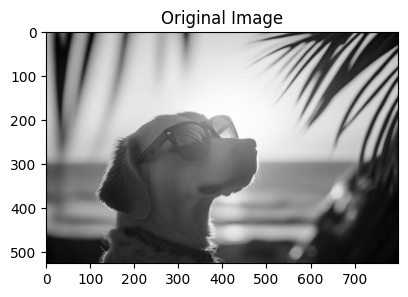

In [26]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image.squeeze(), cmap='gray')

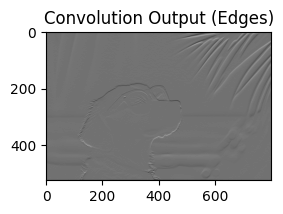

In [27]:
plt.subplot(1, 2, 2)
plt.title("Convolution Output (Edges)")
plt.imshow(output_image, cmap='gray')
plt.show()

# nltk (12 may)

In [7]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [8]:
import nltk

In [9]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...


True